In [1]:
""" 

                                                                                                            Dimensionality Reduction : LDA, PCA, t-SNE

=> proses pelatihan akan menjadi lambat dan memakan waktu lama. Contoh lain pada kasus image recognition, di mana atribut dari image adalah jumlah pixel dari gambar tersebut. 
Jika sebuah gambar memiliki resolusi 28 x 28 pixel, maka gambar tersebut memiliki 784 atribut. Pengurangan dimensi akan mempercepat pelatihan model secara signifikan.     

Ada beberapa teknik dalam pengurangan dimensi :


1. Principal Component Analysis (PCA)
  => tujuan dari PCA adalah mengurangi jumlah atribut pada dataset tanpa mengurangi informasi.
  => PCA bekerja dengan menghitung variance dari tiap atribut. Variance adalah informasi yang dimiliki sebuah atribut. Misal pada dataset rumah, 
     atribut jumlah kamar memiliki variance atau informasi sebesar 92% dan warna rumah memiliki variance/informasi sebesar 4% tentang harga rumah terkait. 
     Dari hasil perhitungan variance, atribut warna rumah dapat dibuang dari dataset karena tidak memiliki informasi yang cukup signifikan ketika kita ingin mempercepat pelatihan sebuah model.

2. Linear Discriminant Analysis (LDA)
  => teknik statistika yang dipakai untuk reduksi dimensi. LDA bekerja dengan mencari kombinasi atribut terbaik yang dapat memisahkan kelas-kelas pada dataset dan meminimalkan varian pada masing-masing kelas. 
     Kontras dengan PCA yang bekerja dengan mencari atribut komponen yang memiliki varian tertinggi.
     Tujuan LDA adalah mengurangi dimensi dataset berdimensi-i dengan memproyeksikannya ke subruang berdimensi-j, di mana j<i. LDA menggunakan fitur dari kedua sumbu (X dan Y) untuk membuat sumbu baru, 
     kemudian memproyeksikan data ke sumbu baru dengan cara meminimalkan varians dan memaksimalkan jarak antara dua kategori. Dengan demikian, dua kriteria utama yang digunakan LDA untuk membuat sumbu baru adalah.

     - Meminimalkan varian pada masing-masing kelas.
     - Memaksimalkan jarak antara rata-rata (mean) kedua kelas.

PERBEDAAN : Perbedaan mendasar lain yang membedakan LDA dan PCA adalah PCA merupakan teknik unsupervised karena pada pengurangan dimensi, PCA tidak menghiraukan label yang terdapat pada dataset. 
            Sedangkan LDA merupakan teknik supervised karena LDA memperhatikan bagaimana kelas-kelas pada data dapat dipisahkan dengan baik. 

3. t-Distributed Stochastic Neighbor Embedding (t-SNE)
  => Algoritma t-SNE memungkinkan kita untuk memisahkan data yang tidak dapat dipisahkan oleh garis linear. Dengan t-SNE kita bisa melihat visualisasi bagaimana data tersusun pada ruang berdimensi tinggi.
  => t-SNE menghitung ukuran kesamaan antara pasangan titik data di ruang berdimensi tinggi dan dimensi rendah, kemudian mengoptimalkan dua kesamaan ini. 
  Dengan kata lain, t-SNE mengurangi dimensi dengan menjaga sampel-sampel yang mirip agar berdekatan, dan sebaliknya, sampel-sampel yang kurang mirip, berjauhan

  langkah-langkah dalam algoritma t-SNE sebagai berikut :
  1. menghitung ukuran kesamaan antara pasangan pada ruang berdimensi tinggi
  2. menghitung ukuran kesamaan antara pasangan pada ruang berdimensi rendah
  3. kita ingin himpunan probabilitas dari ruang berdimensi rendah untuk mencerminkan ruang berdimensi tinggi sebaik mungkin sehingga diharapkan kedua struktur peta serupa

"""

' \n\n                                                                                                            Dimensionality Reduction : LDA, PCA, t-SNE\n\n=> proses pelatihan akan menjadi lambat dan memakan waktu lama. Contoh lain pada kasus image recognition, di mana atribut dari image adalah jumlah pixel dari gambar tersebut. \nJika sebuah gambar memiliki resolusi 28 x 28 pixel, maka gambar tersebut memiliki 784 atribut. Pengurangan dimensi akan mempercepat pelatihan model secara signifikan.     \n\nAda beberapa teknik dalam pengurangan dimensi :\n\n\n1. Principal Component Analysis (PCA)\n  => tujuan dari PCA adalah mengurangi jumlah atribut pada dataset tanpa mengurangi informasi.\n  => PCA bekerja dengan menghitung variance dari tiap atribut. Variance adalah informasi yang dimiliki sebuah atribut. Misal pada dataset rumah, \n     atribut jumlah kamar memiliki variance atau informasi sebesar 92% dan warna rumah memiliki variance/informasi sebesar 4% tentang harga rumah terkait

In [52]:
# PCA Mengurangi attribut dan hasilnya masih optimal

In [53]:
from sklearn import datasets

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [64]:
attribute = ['sepal_panjang', 'sepal_lebar', 'petal_panjang', 'petal_lebar']
data = pd.DataFrame(iris.data, columns=
    attribute
)
data.head(5)

,sepal_panjang,sepal_lebar,petal_panjang,petal_lebar
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
attribute = iris.data

In [58]:
label = iris.target

In [59]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
x_train,x_test,y_train,y_test = train_test_split(attribute, label, test_size=0.6)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model = DecisionTreeClassifier()

In [12]:
train_model = model.fit(x_train, y_train)

In [13]:
train_model.score(x_test, y_test)

0.9777777777777777

In [ ]:
#score masih optimal, coba kita kurangi dengan menggunakan PCA demensionalitty reduction apa yang terjadi ?

In [14]:
from sklearn.decomposition import  PCA

In [16]:
pca = PCA(n_components=1) # membuat object PCA menjadi 1 component 

In [17]:
x_pca_train = pca.fit_transform(x_train)

In [18]:
x_pca_test = pca.fit_transform(x_test)

In [19]:
pca.explained_variance_ratio_

array([0.93075894])

In [ ]:
#kita coba 

In [20]:
train_model_pca = model.fit(x_pca_train, y_train)

In [21]:
train_model_pca.score(x_pca_test, y_test)

0.7888888888888889

In [ ]:
#kita mengambil 1 atribut saja hasilnya masih optimal woi

In [ ]:
    """ 
    
                                                                                                PCA IMPLEMENTATION IRIS DATASETS
    
    """

In [22]:
from sklearn.decomposition import PCA

In [23]:
from sklearn import datasets

In [24]:
import seaborn as sns

In [25]:
import pandas as pd

In [26]:
from sklearn.manifold import TSNE

In [27]:
iris = datasets.load_iris()

In [61]:
attribute = ['sepal_panjang', 'sepal_lebar', 'petal_panjang', 'petal_lebar']

In [62]:
data = pd.DataFrame(iris.data, columns=
    attribute
)

In [30]:
data['species'] = iris.target

In [31]:
data.head(5)

,sepal_panjang,sepal_lebar,petal_panjang,petal_lebar,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
                                                                                      """      SEBELUM DATA DI REDUKSI   """ 

In [32]:
x = data['petal_panjang']
y = data['petal_lebar']

In [33]:
data['species'].replace([0,1,2], ['bunga iris sentosa', 'bunga iris verticolos', 'bunga iris virginica'], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


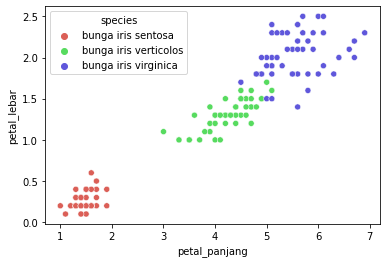

In [34]:
sns.scatterplot(x, y, hue= data['species'], palette=sns.color_palette('hls', 3))

In [ ]:
                                                          """                                               PLOTING DENGAN PCA                                                 """

In [35]:
pca= PCA(n_components=2) #mengambil 2 attribut 

In [36]:
pca_finally = pca.fit_transform(data[attribute])

In [37]:
x_attribute = pca_finally[:,0]
y_attribute = pca_finally[:,1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


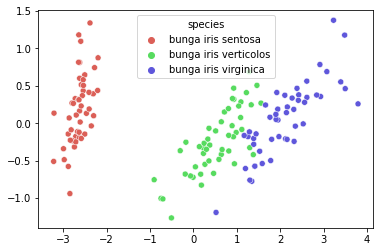

In [38]:
sns.scatterplot(x_attribute, y_attribute, hue= data['species'], palette=sns.color_palette('hls', 3))

In [ ]:
                                                          """                                               PLOTING DENGAN t-SNE                                                 """

In [39]:
tsne = TSNE(n_components=2, n_iter=2000, random_state=42)

In [40]:
tsne_finally = tsne.fit_transform(data[attribute])

In [41]:
xTSNE_attribute = tsne_finally[:,0]
yTSNE_attribute = tsne_finally[:,1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


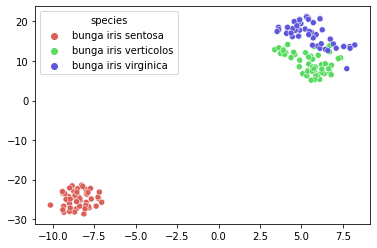

In [42]:
sns.scatterplot(xTSNE_attribute, yTSNE_attribute, hue= data['species'], palette=sns.color_palette('hls', 3))